In [5]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import geopandas as gpd
import geopy.distance

import glob
import os

In [ ]:
# https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/countries

In [72]:
# eu_url = "https://gisco-services.ec.europa.eu/distribution/v2/countries/download/ref-countries-2020-01m.geojson.zip"
eu_url = "https://gisco-services.ec.europa.eu/distribution/v2/countries/download/ref-countries-2020-10m.geojson.zip"

In [73]:
# geoJSON

import opendatasets as od

od.download(eu_url)


10567680it [00:05, 1906213.21it/s]                                                                   


In [74]:
geo_dir = 'eu_geo_maps'

# os.mkdir(geo_dir)

In [75]:
import zipfile

with zipfile.ZipFile("ref-countries-2020-10m.geojson.zip", 'r') as zip_ref:
# with zipfile.ZipFile("ref-countries-2020-01m.geojson.zip", 'r') as zip_ref:
    zip_ref.extractall(geo_dir)

In [76]:
geo_regions_eu = gpd.read_file(geo_dir + '/' + 'CNTR_RG_10M_2020_4326.geojson')
# geo_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_01M_2020_4326.geojson')
# geo_coastl_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_60M_2020_4326_COASTL.geojson')
# geo_inland_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_60M_2020_4326_INLAND.geojson')

geo_boundaries_eu = gpd.read_file(geo_dir + '/' + 'CNTR_BN_10M_2020_4326.geojson')
# geo_labels_eu = gpd.read_file(geo_dir + '/' + 'CNTR_LB_2020_4326.geojson')

In [77]:
print(geo_regions_eu.shape)
print(geo_regions_eu.crs)


(257, 14)
epsg:4326


In [47]:
geo_eu.columns

Index(['id', 'CNTR_ID', 'CNTR_NAME', 'NAME_ENGL', 'NAME_FREN', 'ISO3_CODE',
       'SVRG_UN', 'CAPT', 'EU_STAT', 'EFTA_STAT', 'CC_STAT', 'NAME_GERM',
       'FID', 'geometry'],
      dtype='object')

In [48]:
geo_eu.head()

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,AQ,AQ,Antarctica,Antarctica,Antarctique,ATA,Sovereignty unsettled,None,F,F,F,Antarktis,AQ,"MULTIPOLYGON (((-57.47360 -63.56230, -57.63190..."
1,BV,BV,Bouvetøya,Bouvet Island,Île Bouvet,BVT,NO Territory,None,F,F,F,Bouvetinsel,BV,"POLYGON ((3.08710 -54.40140, 3.40700 -54.34860..."
2,BW,BW,Botswana-Botswana,Botswana,Botswana,BWA,UN Member State,Gaborone,F,F,F,Botsuana,BW,"POLYGON ((25.27030 -17.79890, 26.18730 -19.502..."
3,BY,BY,Беларусь,Belarus,Biélorussie,BLR,UN Member State,Minsk,F,F,F,Belarus,BY,"POLYGON ((31.78690 52.11150, 30.91120 52.02520..."
4,BZ,BZ,Belize,Belize,Belize,BLZ,UN Member State,Belmopan,F,F,F,Belize,BZ,"MULTIPOLYGON (((-87.68040 17.35980, -87.85440 ..."


In [ ]:
# geo_eu = geo_eu.rename(columns={'name':'district'}).drop(['cartodb_id'], axis=1)
# geo_eu.head()


In [49]:
geo_eu.plot(column='geometry', cmap='Set3', legend=True)
plt.title('European Countries')
plt.show()


ValueError: Image size of 155824x5436 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: 'black' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

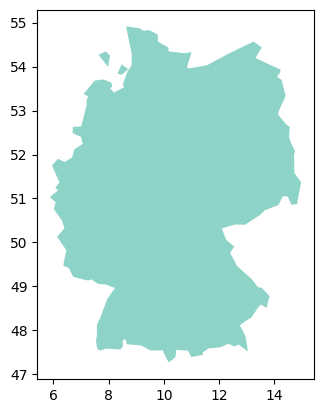

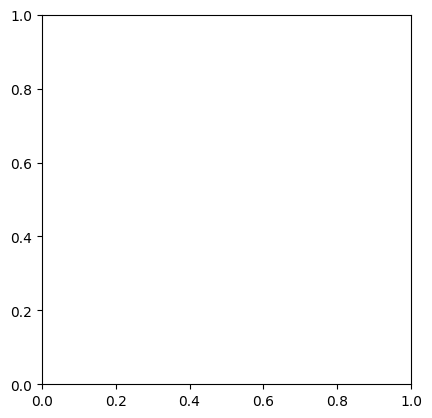

In [58]:
germany_gpd = geo_eu[geo_eu['FID'] == 'DE']

germany_gpd.plot(column='geometry', cmap='Set3') # , cmap='Set3', legend=True
geo_labels_eu.plot(column='geometry', cmap='black')
plt.title('Germany')
plt.show()


In [59]:
import matplotlib.pyplot as plt

AttributeError: module 'geopandas.plotting' has no attribute 'plot_multipolygon'

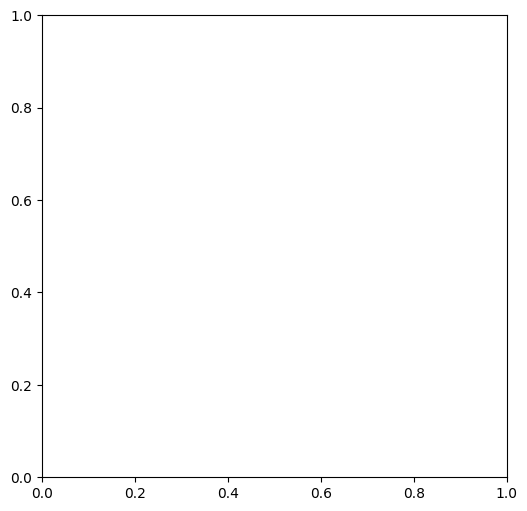

In [60]:
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
for poly in germany_gpd['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='lightgrey', linewidth=0.025)
# Smallest areas
for poly in geo_labels_eu['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, alpha=1, facecolor='red', linewidth=0)
ax.set_axis_off()
f.suptitle('AAAAA')
plt.axis('equal')
plt.show()


In [39]:
geo_coastl_eu.head()

,EU_FLAG,EFTA_FLAG,CC_FLAG,COAS_FLAG,CNTR_BN_ID,OTHR_FLAG,POL_STAT,CNTR_BN_CODE,CNTR_CODE,FID,geometry
0,F,F,F,T,157,T,0,157,AQ,157,"LINESTRING (-58.73750 -62.06850, -58.38930 -61..."
1,F,F,F,T,158,T,0,158,AQ,158,"LINESTRING (-180.00000 -89.90000, -180.00000 -..."
2,F,F,F,T,159,T,0,159,AQ,159,"LINESTRING (-55.38080 -61.15310, -55.33190 -60..."
3,F,F,F,T,160,T,0,160,AQ,160,"LINESTRING (-45.78690 -60.56430, -45.68330 -60..."
4,F,F,F,T,161,T,0,161,AQ,161,"LINESTRING (-45.59800 -60.58720, -45.53420 -60..."


In [40]:
geo_inland_eu.head()

,EU_FLAG,EFTA_FLAG,CC_FLAG,COAS_FLAG,CNTR_BN_ID,OTHR_FLAG,POL_STAT,CNTR_BN_CODE,CNTR_CODE,FID,geometry
0,F,F,F,F,171,T,0,171,CL,171,"LINESTRING (-68.60750 -54.89340, -68.60820 -53..."
1,F,F,F,F,203,T,0,203,UY,203,"LINESTRING (-57.61900 -30.17590, -58.13160 -31..."
2,F,F,F,F,204,T,0,204,UY,204,"LINESTRING (-53.37800 -33.75040, -53.50950 -33..."
3,F,F,F,F,206,T,0,206,ZA,206,"LINESTRING (27.03270 -29.61710, 27.37000 -29.4..."
4,F,F,F,F,207,T,0,207,SN,207,"LINESTRING (-16.50680 13.59090, -16.13950 13.5..."


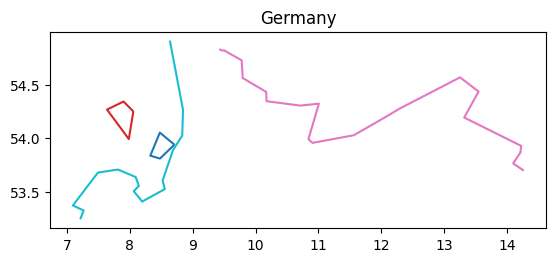

In [44]:
germany_coastl_gpd = geo_coastl_eu[geo_coastl_eu['CNTR_CODE'] == 'DE']

germany_coastl_gpd.plot(column='geometry') # , cmap='Set3', legend=True
plt.title('Germany')
plt.show()


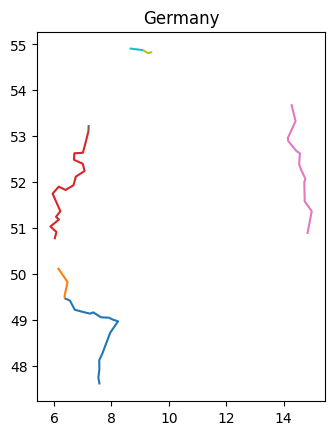

In [42]:
germany_inland_gpd = geo_inland_eu[geo_inland_eu['CNTR_CODE'] == 'DE']

germany_inland_gpd.plot(column='geometry') # , cmap='Set3', legend=True
plt.title('Germany')
plt.show()


In [55]:
geo_labels_eu.head()

,id,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,FID,geometry
0,AD,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,AD,POINT (1.59140 42.54220)
1,AE,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,AE,POINT (53.98240 23.46560)
2,AF,AF,افغانستان-افغانستان,Afghanistan,Afghanistan,AFG,UN Member State,Kabul,F,F,F,Afghanistan,AF,POINT (65.99790 33.81790)
3,AG,AG,Antigua and Barbuda,Antigua and Barbuda,Antigua-et-Barbuda,ATG,UN Member State,St John's,F,F,F,Antigua und Barbuda,AG,POINT (-61.80970 17.07850)
4,AI,AI,Anguilla,Anguilla,Anguilla,AIA,UK Non-Self-Governing Territory,The Valley,F,F,F,Anguilla,AI,POINT (-63.03760 18.22410)


In [81]:
cities = pd.read_csv("worldcities.csv")
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [87]:
cities_coord = cities[['city', 'lat', 'lng', 'iso2', 'population']].sort_values('population', ascending=False)
cities_coord.head()

,city,lat,lng,iso2,population
0,Tokyo,35.6897,139.6922,JP,37732000.0
1,Jakarta,-6.1750,106.8275,ID,33756000.0
2,Delhi,28.6100,77.2300,IN,32226000.0
3,Guangzhou,23.1300,113.2600,CN,26940000.0
4,Mumbai,19.0761,72.8775,IN,24973000.0


In [88]:
cities_coord_gdf = gpd.GeoDataFrame(
    cities_coord, geometry=gpd.points_from_xy(cities_coord.lng, cities_coord.lat), crs="EPSG:4326"
)
cities_coord_gdf.head()

,city,lat,lng,iso2,population,geometry
0,Tokyo,35.6897,139.6922,JP,37732000.0,POINT (139.69220 35.68970)
1,Jakarta,-6.1750,106.8275,ID,33756000.0,POINT (106.82750 -6.17500)
2,Delhi,28.6100,77.2300,IN,32226000.0,POINT (77.23000 28.61000)
3,Guangzhou,23.1300,113.2600,CN,26940000.0,POINT (113.26000 23.13000)
4,Mumbai,19.0761,72.8775,IN,24973000.0,POINT (72.87750 19.07610)


In [93]:
germany_cities_gpd = cities_coord_gdf[
    (cities_coord_gdf['iso2'] == 'DE') & 
    (cities_coord_gdf['population'] >= 600000 )
]
germany_cities_gpd.head(40)

,city,lat,lng,iso2,population,geometry
159,Berlin,52.5200,13.4050,DE,4473101.0,POINT (13.40500 52.52000)
290,Stuttgart,48.7775,9.1800,DE,2787724.0,POINT (9.18000 48.77750)
317,Munich,48.1375,11.5750,DE,2606021.0,POINT (11.57500 48.13750)
335,Hamburg,53.5500,10.0000,DE,2484800.0,POINT (10.00000 53.55000)
700,Cologne,50.9364,6.9528,DE,1083498.0,POINT (6.95280 50.93640)
1101,Frankfurt,50.1106,8.6822,DE,764104.0,POINT (8.68220 50.11060)
1269,Düsseldorf,51.2333,6.7833,DE,645923.0,POINT (6.78330 51.23330)
1329,Leipzig,51.3400,12.3750,DE,615081.0,POINT (12.37500 51.34000)


In [62]:
import geoplot as gplt

/opt/homebrew/lib/python3.11/site-packages/geoplot/geoplot.py:1659: UserWarning: "webmap" is only compatible with the "WebMercator" projection, but the input projection is unspecified. Reprojecting the data to "WebMercator" automatically. To suppress this warning, set "projection=gcrs.WebMercator()" explicitly.
  warnings.warn(


<GeoAxesSubplot: >

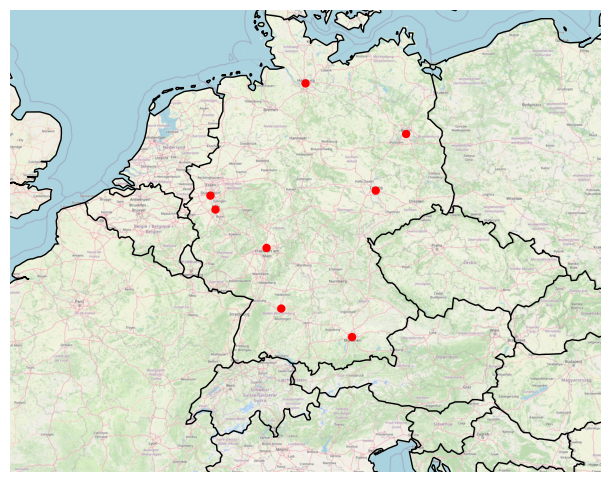

In [103]:
import geoplot.crs as gcrs

# https://residentmario.github.io/geoplot/api_reference.html

extent_coord = (0, 45, 20, 55)

ax = gplt.webmap(germany_gpd, extent=extent_coord) # , projection=gcrs.WebMercator()
gplt.pointplot(germany_cities_gpd, ax=ax, color='red', extent=extent_coord)
gplt.polyplot(geo_boundaries_eu, ax=ax, extent=extent_coord)
# gplt.xlim(0,20)
# gplt.ylim(40,60)


In [8]:
import requests


In [10]:
# Countries 2020 files are listed in:

geo_api_url = "https://gisco-services.ec.europa.eu/distribution/v2/countries/countries-2020-files.json"
geo_response = requests.get(geo_api_url)
geo_response.status_code

200

In [11]:
geo_request = geo_response.request
geo_request.headers

{'User-Agent': 'python-requests/2.28.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [12]:
geo_response.json()

{'csv': {'CNTR_AT_2020.csv': 'csv/CNTR_AT_2020.csv',
  'CNTR_RG_BN_01M_2020.csv': 'csv/CNTR_RG_BN_01M_2020.csv',
  'CNTR_RG_BN_03M_2020.csv': 'csv/CNTR_RG_BN_03M_2020.csv',
  'CNTR_RG_BN_10M_2020.csv': 'csv/CNTR_RG_BN_10M_2020.csv',
  'CNTR_RG_BN_20M_2020.csv': 'csv/CNTR_RG_BN_20M_2020.csv',
  'CNTR_RG_BN_60M_2020.csv': 'csv/CNTR_RG_BN_60M_2020.csv'},
 'geojson': {'CNTR_BN_01M_2020_3035.geojson': 'geojson/CNTR_BN_01M_2020_3035.geojson',
  'CNTR_BN_01M_2020_3035_COASTL.geojson': 'geojson/CNTR_BN_01M_2020_3035_COASTL.geojson',
  'CNTR_BN_01M_2020_3035_INLAND.geojson': 'geojson/CNTR_BN_01M_2020_3035_INLAND.geojson',
  'CNTR_BN_01M_2020_3857.geojson': 'geojson/CNTR_BN_01M_2020_3857.geojson',
  'CNTR_BN_01M_2020_3857_COASTL.geojson': 'geojson/CNTR_BN_01M_2020_3857_COASTL.geojson',
  'CNTR_BN_01M_2020_3857_INLAND.geojson': 'geojson/CNTR_BN_01M_2020_3857_INLAND.geojson',
  'CNTR_BN_01M_2020_4326.geojson': 'geojson/CNTR_BN_01M_2020_4326.geojson',
  'CNTR_BN_01M_2020_4326_COASTL.geojson': 'geoj

In [ ]:
# Examples: NUTS_RG_01M_2016_3035_LEVL_0.geojson, CNTR_BN_01M_2016_3035_INLAND.geojson

# theme: 4-character code of theme (NUTS)

# spatialtype: BN/RG/LB
# BN: boundaries (multilines)
# RG: regions (multipolygons)
# LB: labels (points)
# resolution: 60M/20M/10M/03M/01M; map scale the data is optimized (generalized) for.

# year: the year of NUTS regulation (2016/2013/2010/2006/2003).
# projection: 4-digit EPSG code
# EPSG:4326 (WGS84, coordinates in decimal degrees)
# EPSG:3035 (ETRS 1989 in Lambert Azimutal projection with centre in E52N10, coordinates in meters)
# EPSG:3857 (WGS84 Web Mercator Auxiliary Sphere, coordinates in meters)
# subset: depends on the dataset. Common cases:
# NUTS levels 0,1,2,3. No subset code means all NUTS levels are in the same file.
# LEVL_0: NUTS level 0 (countries)
# LEVL_1: NUTS level 1
# LEVL_2: NUTS level 2
# LEVL_3: NUTS level 3
# Country boundaries: coastline or inland line. No subset code means all country boundaries are in the same file.
# INLAND: inland boundaries
# COASTL: coastlines

In [ ]:
# 4326
